## Задание

Построить модель машинного обучения, позволяющую предсказать, является ли цветок цветком класса Ирис-Вирджиния или нет.

### План решения:

1. Из библиотеки scikit-learn подгрузите данные. Мы уже работали с ними в рамках Темы 1.

In [119]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [120]:
df = load_iris(as_frame=True).frame
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

2. Сформируйте новое поле target_virginica, которое будет равно из 0, если цветок не является классом 2, иначе  — 1. Убедитесь, что разметка выполнена корректно, рассчитав количество объектов каждого класса по новой целевой переменной target_virginica.

In [121]:
df['target_virginica'] = df['target'].apply(lambda x: 1 if x == 2 else 0)

In [122]:
display(df.groupby('target_virginica')['target'].value_counts())

target_virginica  target
0                 0         50
                  1         50
1                 2         50
Name: count, dtype: int64

2. Обучите библиотечную модель логистической регрессии на обучающей части данных.

In [123]:
features = df.drop(['target', 'target_virginica'], axis=1)
target = df['target_virginica']

features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression()
log_reg_model.fit(features_train, target_train)
predictions_log_reg = log_reg_model.predict(features_val)

3. Оцените качество обученной на предыдущем шаге модели, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

In [124]:
def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print("Ошибок:", count_errors(target_val, predictions_log_reg))

print("Accuracy:", accuracy_score(target_val, predictions_log_reg))

Ошибок: 0
Accuracy: 1.0


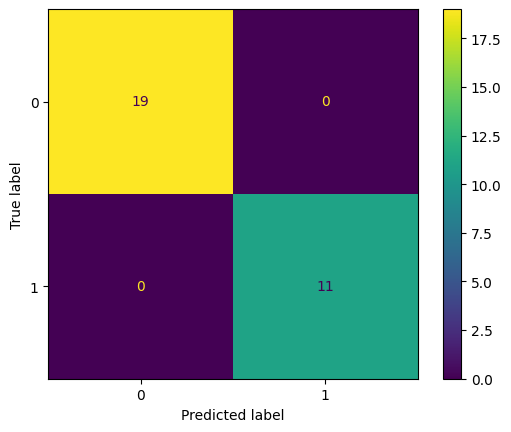

In [125]:
ConfusionMatrixDisplay(confusion_matrix(target_val, predictions_log_reg)).plot()

### Вывод:

Обученная модель прошла оценку по матрице ошибок со следующими показателями качества:
- полнота = 1
- точность = 1
- F1-мера = 1

4. Сконструируйте свой класс MyLogisticRegression, решающий задачу логистической регрессии методом градиентного спуска. 

Он должен:
- инициализироваться величиной шага градиентного спуска и количеством итераций градиентного спуска
- содержать метод fit для обучения модели, на вход которой будут подаваться обучающие данные
- чтобы реализовать функцию sigmoid, можно воспользоваться библиотечной функцией np.exp
- для расчета градиента необходимо использовать формулу, приведенную в курсе в блоке «Логистическая регрессия для решения задачи бинарной классификации».
- должен содержаться метод predict, который будет возвращать лейбл 0/1.
- лейбл должен рассчитываться из вероятности принадлежности классу 1.
- вероятность должна рассчитываться как сигмоида от результата произведения матрицы фичей X и вектора весов модели w.

In [126]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights)
            predictions = self.sigmoid(linear_model)

            gradient = np.dot(X.T, (predictions - y)) / n_samples
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        predictions = self.sigmoid(linear_model)
        return np.where(predictions >= 0.5, 1, 0)

5. Обучите модель с помощью реализованного класса с произвольными параметрами градиентного спуска.

In [127]:
my_model = MyLogisticRegression(learning_rate=0.1, n_iterations=1000)
my_model.fit(features_train, target_train)

my_predictions = my_model.predict(features_val)

6. Оцените качество модели, обученной с помощью класса MyLogisticRegression, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных. Подберите такие параметры градиентного спуска, чтобы разделение получилось не хуже, чем у библиотечной модели.

In [128]:
print("Ошибок:", count_errors(target_val, my_predictions))

print("Accuracy:", accuracy_score(target_val, my_predictions))

Ошибок: 0
Accuracy: 1.0


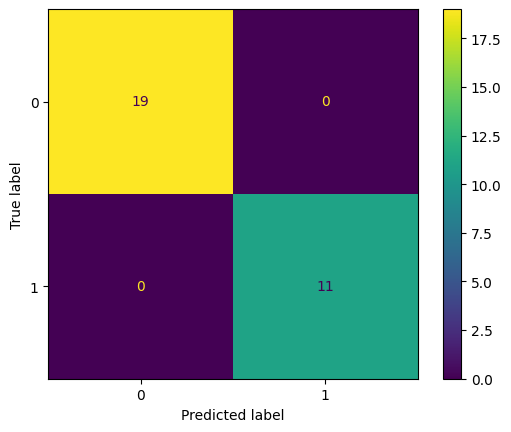

In [129]:
ConfusionMatrixDisplay(confusion_matrix(target_val, my_predictions)).plot()

###Вывод:

Качество модели, обученной с помощью класса MyLogisticRegression, получилось не хуже:
- полнота = 1
- точность = 1
- F1-мера = 1